In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from time import time

In [2]:
train=pd.read_csv("train.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X=train.drop(columns=['label']).values
y=train['label'].values

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Applying DCT on all features

In [6]:
scalar=StandardScaler()

In [7]:
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [8]:
pca=PCA(n_components=None)

In [9]:
X_train_new=pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)

In [10]:
dct=DecisionTreeClassifier()

In [11]:
dct.fit(X_train_new,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
y_pred=dct.predict(X_test_new)

In [13]:
accuracy_score(y_pred,y_test)

0.7945238095238095

## Applying a loop to see how many features gives the best accuracy_score

In [14]:
scores=[]

for i in range(1,785):
    start_time=time()
    pca=PCA(n_components=i)
    X_train_new=pca.fit_transform(X_train)
    X_test_new=pca.transform(X_test)
    dct=DecisionTreeClassifier()
    dct.fit(X_train_new,y_train)
    y_pred=dct.predict(X_test_new)
    scores.append(accuracy_score(y_pred,y_test))
    print(f'PCA on {i} features: {scores[-1]}, Time: {time()-start_time}')

PCA on 1 features: 0.22273809523809524, Time: 1.7927966117858887
PCA on 2 features: 0.29369047619047617, Time: 1.692497968673706
PCA on 3 features: 0.45535714285714285, Time: 1.9842383861541748
PCA on 4 features: 0.5926190476190476, Time: 1.9161252975463867
PCA on 5 features: 0.6642857142857143, Time: 2.0464425086975098
PCA on 6 features: 0.7353571428571428, Time: 2.8265063762664795
PCA on 7 features: 0.7438095238095238, Time: 2.2890830039978027
PCA on 8 features: 0.775952380952381, Time: 2.6590657234191895
PCA on 9 features: 0.7832142857142858, Time: 2.624943971633911
PCA on 10 features: 0.8072619047619047, Time: 2.898733615875244
PCA on 11 features: 0.8071428571428572, Time: 2.79643177986145
PCA on 12 features: 0.8057142857142857, Time: 3.1433863639831543
PCA on 13 features: 0.8141666666666667, Time: 3.2015137672424316
PCA on 14 features: 0.8246428571428571, Time: 3.3438823223114014
PCA on 15 features: 0.8239285714285715, Time: 3.526405096054077
PCA on 16 features: 0.8197619047619048

KeyboardInterrupt: 

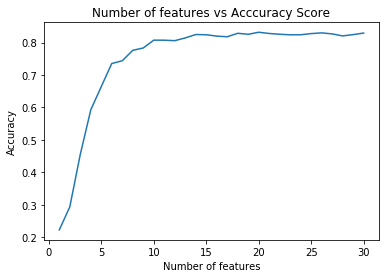

In [15]:
plt.plot(range(1,len(scores)+1),scores)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Number of features vs Acccuracy Score')
plt.show()

### Number of features where best accuracy was found 

In [20]:
np.argmax(np.array(scores))+1

20

### Best Accuracy

In [19]:
scores[np.argmax(np.array(scores))]

0.8316666666666667